#### IMPORTATION DES LIBRAIRIES

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from   sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from   sklearn.cluster import AgglomerativeClustering
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

ModuleNotFoundError: No module named 'tensorflow'

#### IMPORTATION DES DONNEES

In [11]:
data = pd.read_csv("Mall_Customers.csv")
data.head(3)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [12]:
data.shape

(200, 5)

In [13]:
X = data.iloc[:, [3, 4]].values

#### Entraînement des K-MEANS

In [14]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

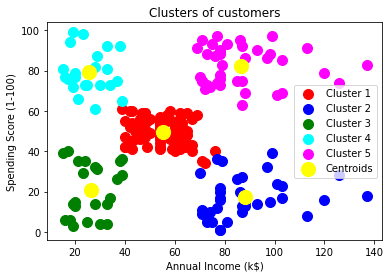

In [17]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

#### Détermination du dendogramme pour déterminer le nombre optimal de cluster

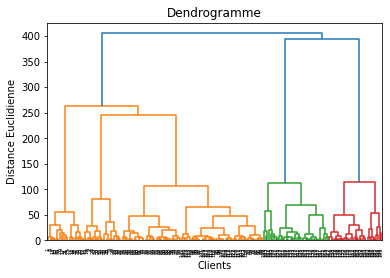

In [18]:
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogramme')
plt.xlabel('Clients')
plt.ylabel('Distance Euclidienne')
plt.show()

#### Entraînement du modèle basé sur les arbres

In [9]:
hc = AgglomerativeClustering(n_clusters = 5, 
                             #affinity = 'euclidean', 
                             linkage = 'ward'
                            )
y_hc = hc.fit_predict(X)

#### Visualisation du cluster

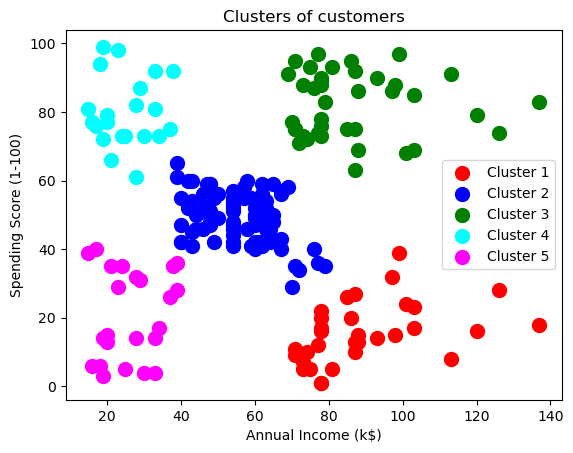

In [27]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()